In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from scipy.fft import fft, ifft,fftshift
from scipy.integrate import solve_ivp
import sys
import warnings
warnings.filterwarnings('ignore')

## Introducing FFT

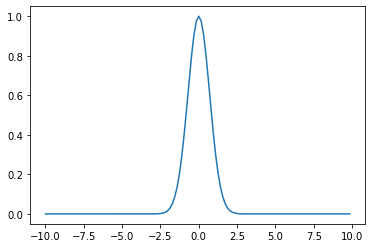

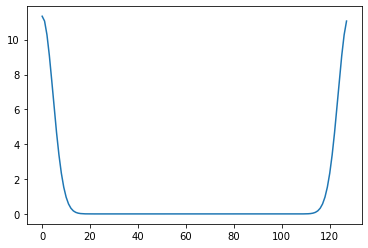

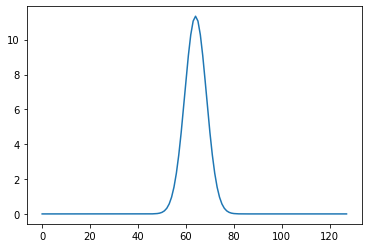

In [2]:
L = 20
n = 128
x2 = np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u = np.exp(-x*x)
ut = fft(u)

utshift = fftshift(ut)

plt.figure()
plt.plot(x,u) #plot initial gaussian
plt.figure()
plt.plot(abs(ut)) # plot unshifted transform
plt.figure()
plt.plot(abs(utshift)) # plot shifted transform

### Take derivatives with FFT

In [3]:
L = 20
n = 128
x2 = np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u = 1/np.cosh(x)
ut = fft(u)

k = (2*np.pi/L)*np.concatenate((np.arange(0,(n/2)),np.arange(-(n/2),0)))

ut1 = 1j*k*ut
ut2 = -k*k*ut
ut3 = -1j*k*k*k*ut

u1 = ifft(ut1)
u2 = ifft(ut2)
u3 = ifft(ut3)

u1exact = -(1/np.cosh(x))*np.tanh(x)

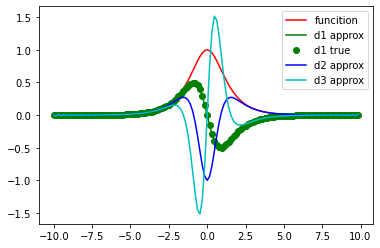

In [4]:
plt.plot(x,u,'r')
plt.plot(x,u1,'g')
plt.plot(x,u1exact,'go')
plt.plot(x,u2,'b')
plt.plot(x,u3,'c')
plt.legend(['funcition','d1 approx','d1 true','d2 approx','d3 approx'])




## Solving the heat equation

In [5]:
#u_t = 5u_{xx}, u(x,0)=f(x), |u|->0 as |x|->infinity

L = 20
n = 128
T = 2
t = np.arange(0, T+0.01,0.01)

x2 = np.linspace(-L/2,L/2,n+1)
x = x2[0:n]

k = (2*np.pi/L)*np.concatenate((np.arange(0,(n/2)),np.arange((-n/2),0)))

In [6]:
f = lambda x: np.exp(-x**2)
y0 = f(x)
y0hat = fft(y0)

FFT_heat = lambda t,u: -5*k*k*u

sol = solve_ivp(FFT_heat,[0,T],y0hat, t_eval = t)
y = np.real(ifft(sol.y,axis=0))

print(np.shape(sol.y))

(128, 201)


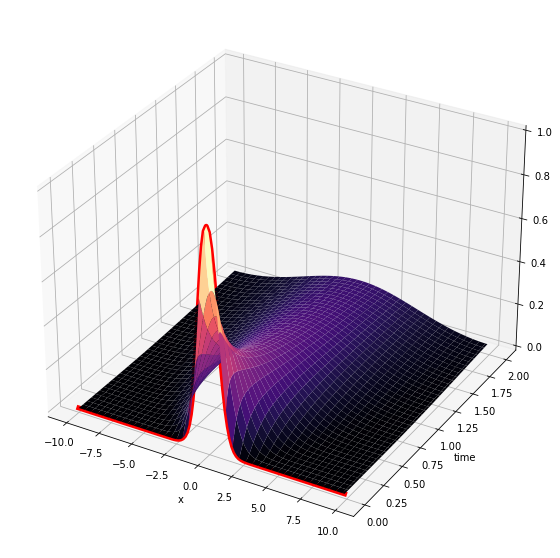

In [7]:
X,T = np.meshgrid(x,sol.t)
fig,ax = plt.subplots(subplot_kw = {"projection":"3d"},figsize=(25,10))

surf=ax.plot_surface(X,T,y.T,cmap='magma')
ax.plot3D(x,0*x,f(x),'-r',linewidth=5)
plt.xlabel('x')
plt.ylabel('time')
plt.show()

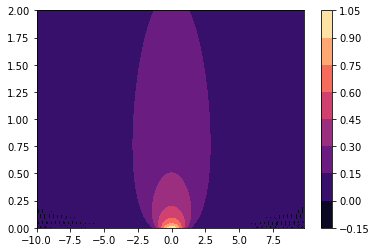

In [8]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X,T,y.T,cmap='magma')
fig.colorbar(cp)
plt.show()

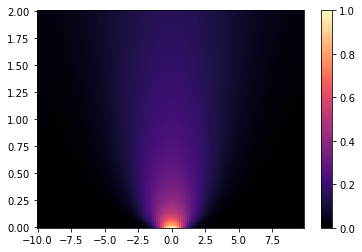

In [9]:
fig,ax=plt.subplots(1,1)
cp = ax.pcolormesh(X,T,y.T,cmap='magma',shading='auto')
fig.colorbar(cp)
plt.show()

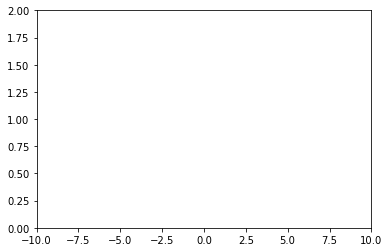

In [10]:
rc('animation',html = 'html5')
fig,ax=plt.subplots()
ax.set_xlim((-10,10))
ax.set_ylim((0,2))
ln, =ax.plot([],[],'r-')
title = ax.text(0.5,0.85,"",bbox={'facecolor':'w','alpha':0.5,"pad":0.5},transform = ax.transAxes,ha='center')

In [11]:
def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,1)
    ax.set_xlabel('x')
    ax.set_ylabel("Heat")
    return ln,

In [12]:
def update(frame):
    xdata = x
    ydata = y[:,frame]
    ln.set_data(xdata,ydata)
    ax.set_title("Heat at time t = %0.2f" % sol.t[frame])
    return ln,

In [13]:
ani = animation.FuncAnimation(fig,update,frames = range(len(t)), init_func=init,blit = True,save_count=sys.maxsize)

In [ ]:
ani

In [ ]:
writergif=animation.PillowWriter(fps=10)
ani.save('heat_sol.gif',writer = writergif)

In [ ]:
writermp4=animation.FFMpegWriter(fps=10)
ani.save('heat_sol.mp4',writer = writermp4)